In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import pickle

In [ ]:
# load the dataset
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
df.shape

(366, 12)

In [12]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [17]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [20]:
# remove extra spaces 
df.columns = df.columns.str.strip()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [22]:
#drop day column 

df = df.drop(columns = ['day'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [23]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [24]:
df[df['winddirection'].isna()]

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
160,1005.7,31.7,28.2,26.6,25.7,86,79,yes,6.5,NaN,NaN


In [31]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mode()[0])

df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [35]:
# change rainfall value to 0 and 1 

rain_values = {'no':0,'yes':1} 

df['rainfall_values'] = df['rainfall'].map(rain_values)
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,rainfall_values
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,1


EDA 

In [37]:
df.shape

(366, 12)

In [40]:
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [41]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall_values
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.284153,21.517760,0.680328
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.722827,10.062633,0.466988
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000,0.000000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000,1.000000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000,1.000000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000,1.000000


In [42]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed',
       'rainfall_values'],
      dtype='object')

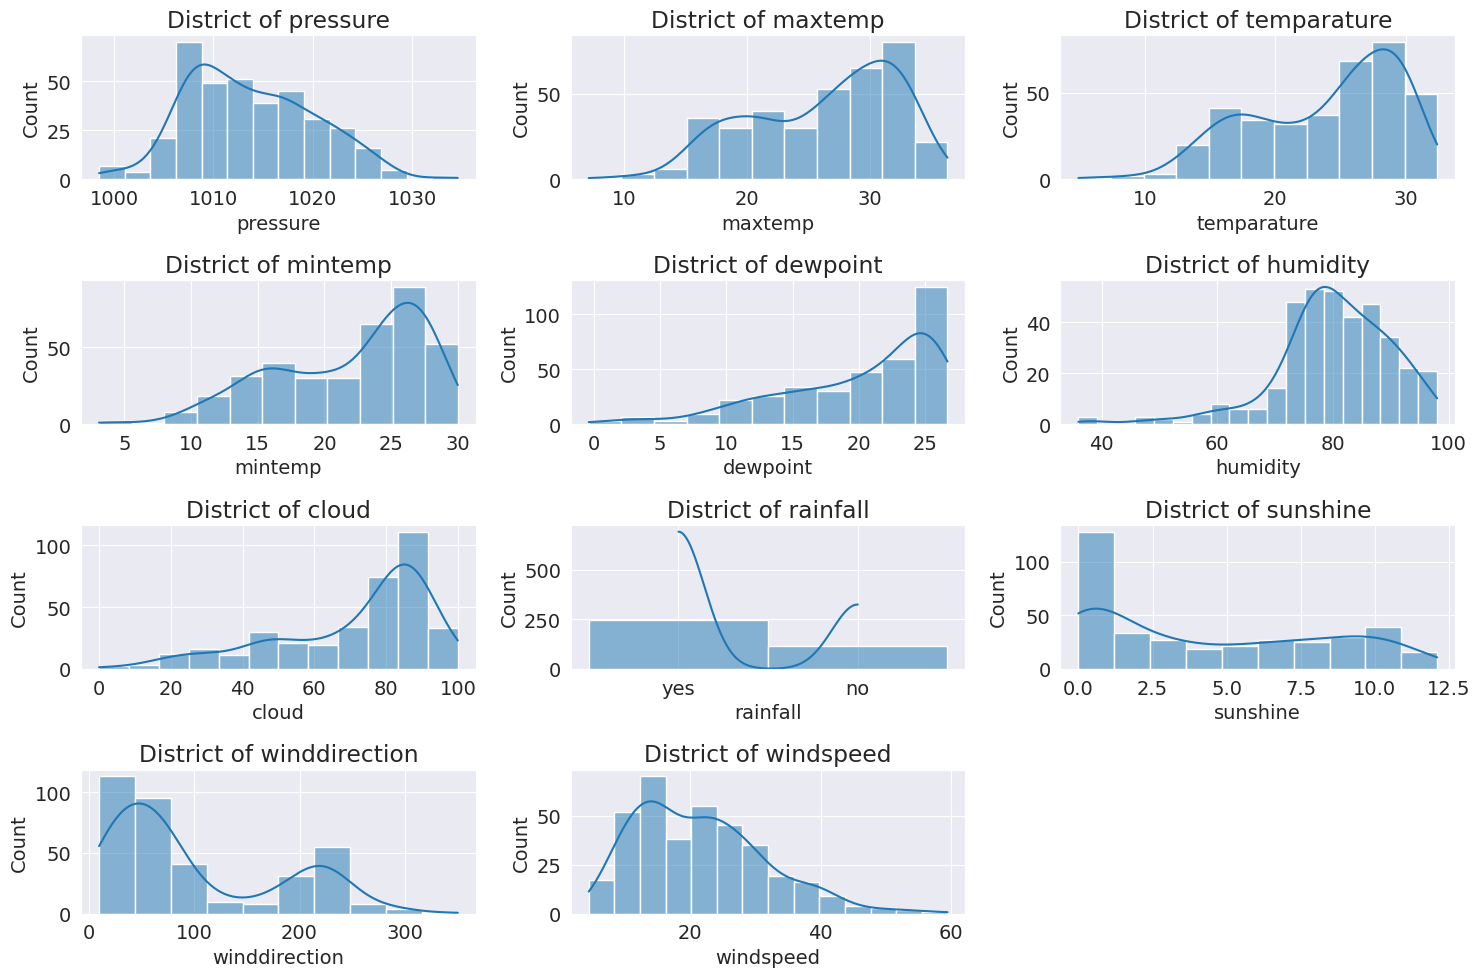

In [53]:
plt.figure(figsize = (15,10))

for i,  column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],1):
    plt.subplot(4,3,i)
    sns.histplot(df[column],kde = True)
    plt.title(f'District of {column}')

plt.tight_layout()
plt.show()


In [55]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,rainfall_values
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,1


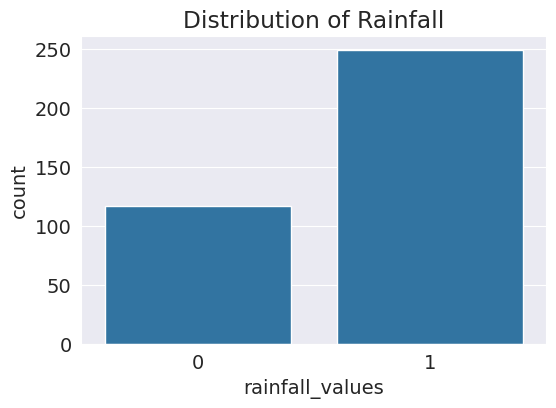

In [57]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'rainfall_values',data =df)
plt.title('Distribution of Rainfall')
plt.show()

In [59]:
#removing rainfall column

df = df.drop(columns = ['rainfall'])

In [60]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall_values
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


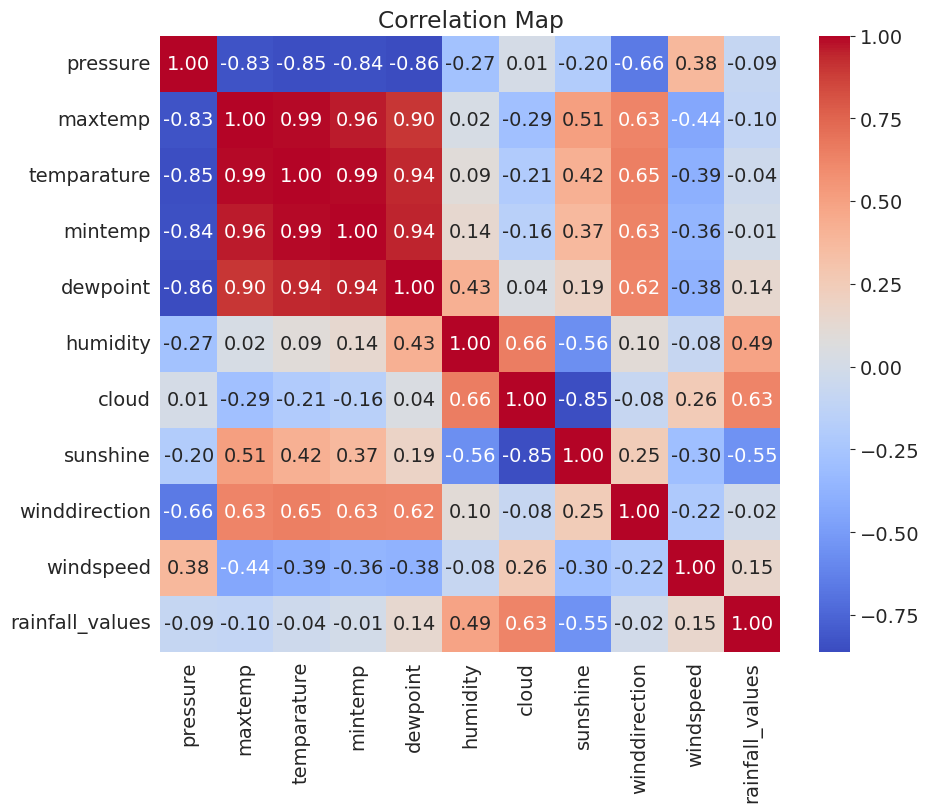

In [61]:
# correlation matrix 

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Map')
plt.show()

In [62]:
# there are many columns which is high corelated 

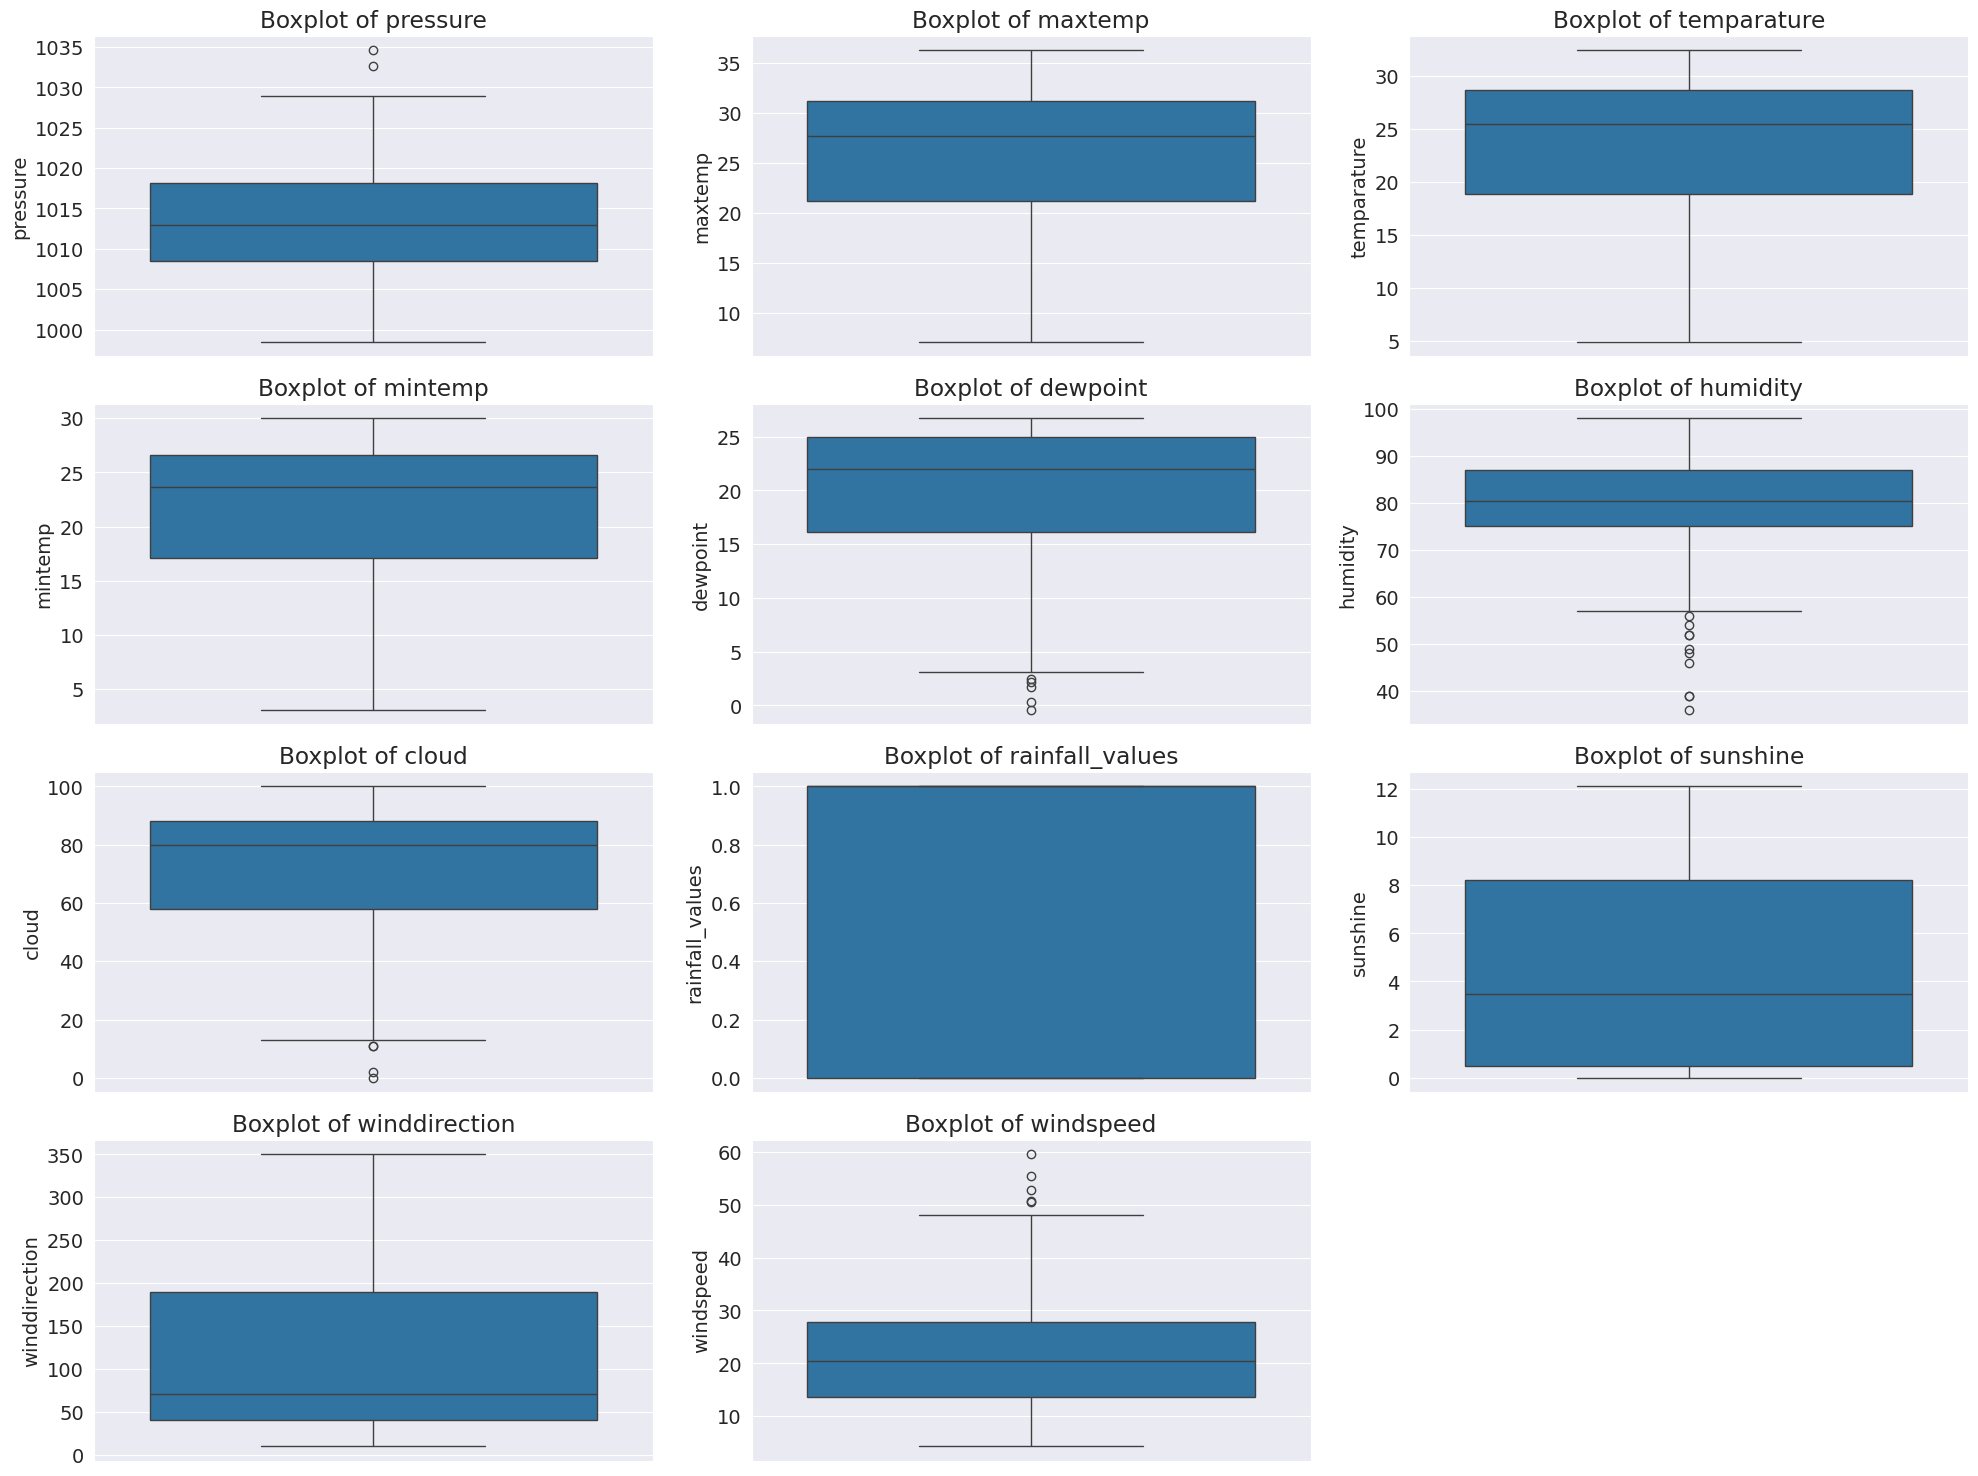

In [68]:
plt.figure(figsize = (20,15))

for i,  column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall_values', 'sunshine', 'winddirection', 'windspeed'],1):
    plt.subplot(4,3,i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


Data Preprocessing

In [70]:
# drop highly correlated columns 

df = df.drop(columns = ['maxtemp','temparature','mintemp'])
df.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall_values
0,1025.9,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,19.9,95,81,0.0,40.0,13.7,1


In [71]:
df['rainfall_values'].value_counts()

rainfall_values
1    249
0    117
Name: count, dtype: int64

In [76]:
# seperate majority and minority class

df_majority = df[df['rainfall_values'] == 1]
df_minority = df[df['rainfall_values'] == 0]

df_majority.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall_values
0,1025.9,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,19.9,95,81,0.0,40.0,13.7,1


In [78]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [79]:
# downsample majority class to match minority count

df_majority_sampled = resample(df_majority,replace = False,n_samples = len(df_minority),random_state = 42)

In [80]:
df_majority_sampled.shape

(117, 8)

In [81]:
df_downsampled = pd.concat([df_majority_sampled,df_minority])
df_downsampled.shape

(234, 8)

In [85]:
df_downsampled.tail()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall_values
351,1025.9,-0.4,39,25,9.1,20.0,35.6,0
352,1026.4,3.1,48,11,9.5,40.0,25.2,0
353,1025.4,8.7,62,71,2.1,30.0,29.0,0
360,1020.6,13.3,74,87,0.6,30.0,21.6,0
365,1026.4,13.0,74,66,5.7,20.0,23.3,0


In [88]:
# shuffle the  final dataset 

df_downsampled = df_downsampled.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall_values
0,1008.2,26.6,83,81,8.4,230.0,20.5,1
1,1012.7,23.2,75,47,7.9,60.0,24.5,0
2,1012.0,23.0,74,44,10.1,70.0,26.2,1
3,1014.5,19.5,86,83,3.6,50.0,8.3,0
4,1011.3,23.1,73,60,9.0,70.0,39.5,0


In [89]:
df_downsampled['rainfall_values'].value_counts()

rainfall_values
1    117
0    117
Name: count, dtype: int64

Splitting the data into test, train and test data .

In [90]:
x = df_downsampled.drop(columns = ['rainfall_values'])
y = df_downsampled['rainfall_values'] 

In [91]:
x.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1008.2,26.6,83,81,8.4,230.0,20.5
1,1012.7,23.2,75,47,7.9,60.0,24.5
2,1012.0,23.0,74,44,10.1,70.0,26.2
3,1014.5,19.5,86,83,3.6,50.0,8.3
4,1011.3,23.1,73,60,9.0,70.0,39.5


In [92]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: rainfall_values, dtype: int64

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

Model Training

In [95]:
rf_model = RandomForestClassifier(random_state =42)

param_grid_rf = {
    'n_estimators':[50,100,200],
    'max_features':['sqrt','log2'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [96]:
# Hyperparameter using GridSearchCV

grid_search_rf = GridSearchCV(estimator = rf_model,param_grid = param_grid_rf,cv = 5,n_jobs = 1,verbose = 2)
grid_search_rf.fit(x_train,y_train) 


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [98]:
best_rf_model = grid_search_rf.best_estimator_
print('Best parameters for Random Forest:',grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [100]:
# model evaluation

In [101]:
cv_scores = cross_val_score(best_rf_model,x_train,y_train,cv = 5,scoring = 'accuracy')
print('cross_validation_score:',cv_scores)
print('Mean of Cross validation',cv_scores.mean())

cross_validation_score: [0.78947368 0.78947368 0.91891892 0.81081081 0.78378378]
Mean of Cross validation 0.8184921763869133


In [ ]:
# test set performance 

y_pred = best_rf_model.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('Test set confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('classifaction report:\n',classification_report(y_test,y_pred))

accuracy: 0.8085106382978723
Test set confusion Matrix:
 [[19  4]
 [ 5 19]]
classifaction report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.83      0.79      0.81        24

    accuracy                           0.81        47
   macro avg       0.81      0.81      0.81        47
weighted avg       0.81      0.81      0.81        47



In [109]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [114]:
# predicition on unknown data 

input_data = (1015.9 , 19.9,95,81.0,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

predicition = best_rf_model.predict(input_df)
print('Prediction result :','Rainfall' if predicition[0] == 1 else 'No Rainfall')

Prediction result : Rainfall


In [117]:
# save model and feature name a pickle file 

model_data = {'model':best_rf_model,'features_names':x.columns.tolist()}

with open('rainfall_prediction_model.pkl','wb') as file:
    pickle.dump(model_data,file)

Load the saved model and file and use it for prediction 

In [118]:
import pickle 
import pandas 

In [119]:
# load the trained model and features names from the pickle file 

with open('rainfall_prediction_model.pkl','rb') as file:
    model_data = pickle.load(file)

In [122]:
model = model_data['model']
features_names = model_data['features_names']

In [128]:
input_data = (015.9 , 19.9,95,81.0,0.0,40.0,13.7)

input_df = pd.DataFrame([input_data],columns = features_names)

prediction_test = best_rf_model.predict(input_df)
print('Rainfall prediction:', 'Rainfall' if prediction_test[0] == 1 else 'No Rain')


Rainfall prediction: Rainfall
